In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/product-retail-price-survey-2017-2025/Retail_Prices_of _Products_dashboard.pbix
/kaggle/input/product-retail-price-survey-2017-2025/Retail_Prices_of _Products.csv
/kaggle/input/product-retail-price-survey-2017-2025/Data_Dictionary.txt


In [2]:
df = pd.read_csv('/kaggle/input/product-retail-price-survey-2017-2025/Retail_Prices_of _Products.csv')

In [3]:
df

,Year,Month,GEO,Product Category,Products,VALUE,Taxable,Total tax rate,Value after tax,Essential,COORDINATE,UOM
0,2017,January,Province 1,Meat & Poultry,"Beef stewing cuts, per kilogram",12.66,No,11.0,12.66,Essential,11.100,Dollars
1,2017,January,Province 1,Meat & Poultry,"Beef striploin cuts, per kilogram",21.94,No,11.0,21.94,Essential,11.200,Dollars
2,2017,January,Province 1,Meat & Poultry,"Beef top sirloin cuts, per kilogram",13.44,No,11.0,13.44,Essential,11.300,Dollars
3,2017,January,Province 1,Meat & Poultry,"Beef rib cuts, per kilogram",20.17,No,11.0,20.17,Essential,11.410,Dollars
4,2017,January,Province 1,Meat & Poultry,"Ground beef, per kilogram",9.12,No,11.0,9.12,Essential,11.400,Dollars
...,...,...,...,...,...,...,...,...,...,...,...,...
118477,2025,February,Province 11,Nuts & Snacks,"Sunflower seeds, 400 grams",4.50,No,12.0,4.50,Non-Essential,10.109,Dollars
118478,2025,February,Province 11,Toiletries & Cleaning,"Deodorant, 85 grams",8.07,Yes,12.0,9.04,Essential,10.750,Dollars
118479,2025,February,Province 11,Toiletries & Cleaning,"Toothpaste, 100 millilitres",4.13,Yes,12.0,4.63,Essential,10.760,Dollars
118480,2025,February,Province 11,Toiletries & Cleaning,"Shampoo, 400 millilitres",7.18,Yes,12.0,8.04,Essential,10.770,Dollars


In [4]:
df['UOM'].value_counts()

UOM
Dollars    118482
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118482 entries, 0 to 118481
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              118482 non-null  int64  
 1   Month             118482 non-null  object 
 2   GEO               118482 non-null  object 
 3   Product Category  118482 non-null  object 
 4   Products          118482 non-null  object 
 5   VALUE             118482 non-null  float64
 6   Taxable           118482 non-null  object 
 7   Total tax rate    118482 non-null  float64
 8   Value after tax   118482 non-null  float64
 9   Essential         118482 non-null  object 
 10  COORDINATE        118482 non-null  float64
 11  UOM               118482 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 10.8+ MB


In [6]:
df.describe()

,Year,VALUE,Total tax rate,Value after tax,COORDINATE
count,118482.000000,118482.000000,118482.000000,118482.000000,118482.000000
mean,2020.591837,5.437324,12.632134,5.515499,6.501741
std,2.355363,5.192748,2.899124,5.215311,3.172173
min,2017.000000,0.300000,5.000000,0.300000,1.100000
25%,2019.000000,2.850000,11.000000,2.910000,3.750000
50%,2021.000000,3.990000,13.000000,4.050000,6.500000
75%,2023.000000,5.810000,15.000000,5.947500,9.240000
max,2025.000000,48.450000,15.000000,48.450000,11.990000


In [7]:
df.columns

Index(['Year', 'Month', 'GEO', 'Product Category', 'Products', 'VALUE',
       'Taxable', 'Total tax rate', 'Value after tax', 'Essential',
       'COORDINATE', 'UOM'],
      dtype='object')

# DATA VIZUALIZAION
> As we clearly see that in there is high variance in the `Coordinate kdeplot`.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
cols = ['Year', 'Month', 'GEO', 'Product Category', 'Products', 'VALUE',
       'Taxable', 'Total tax rate', 'Value after tax', 'Essential',
       'COORDINATE', 'UOM']

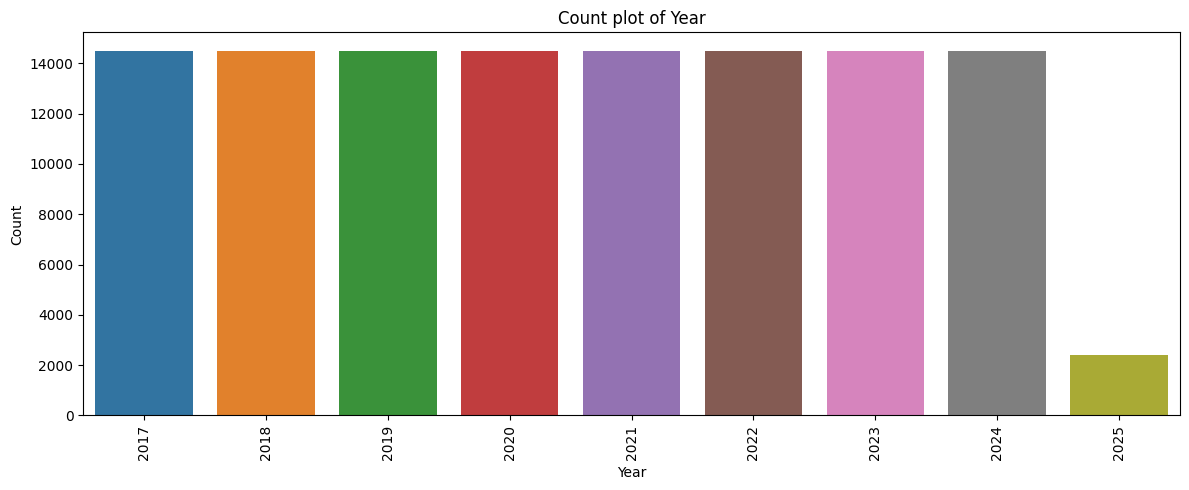

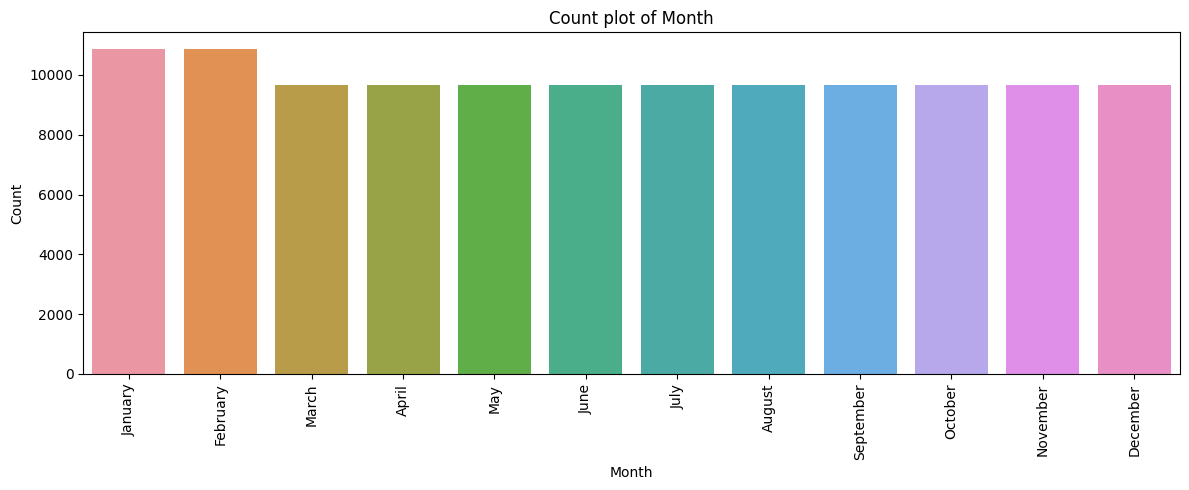

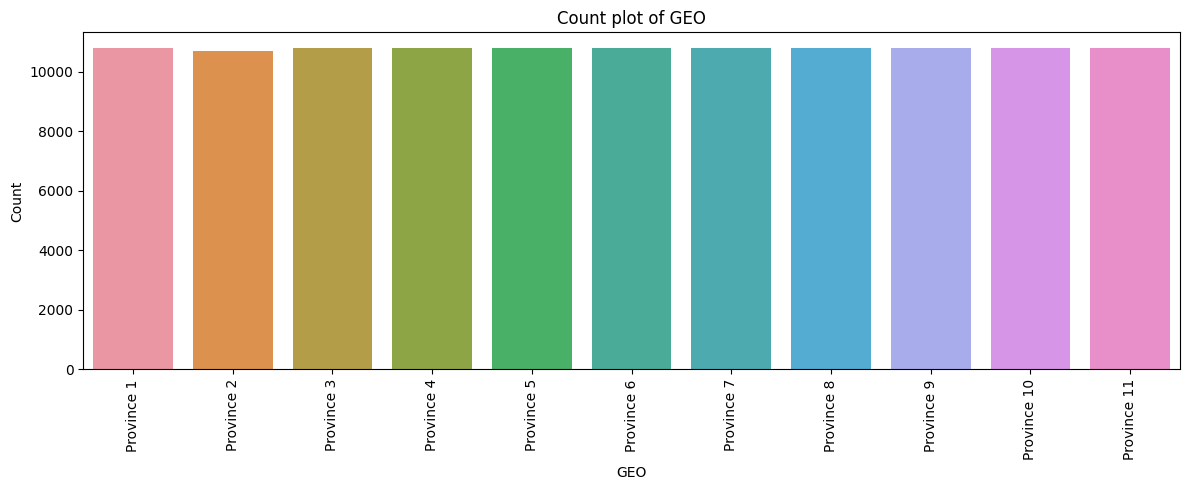

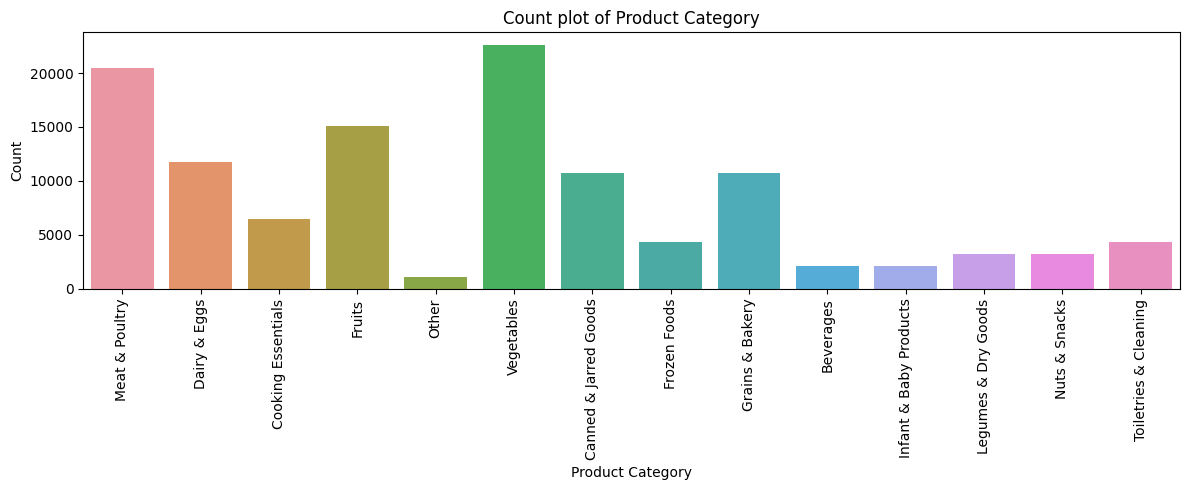

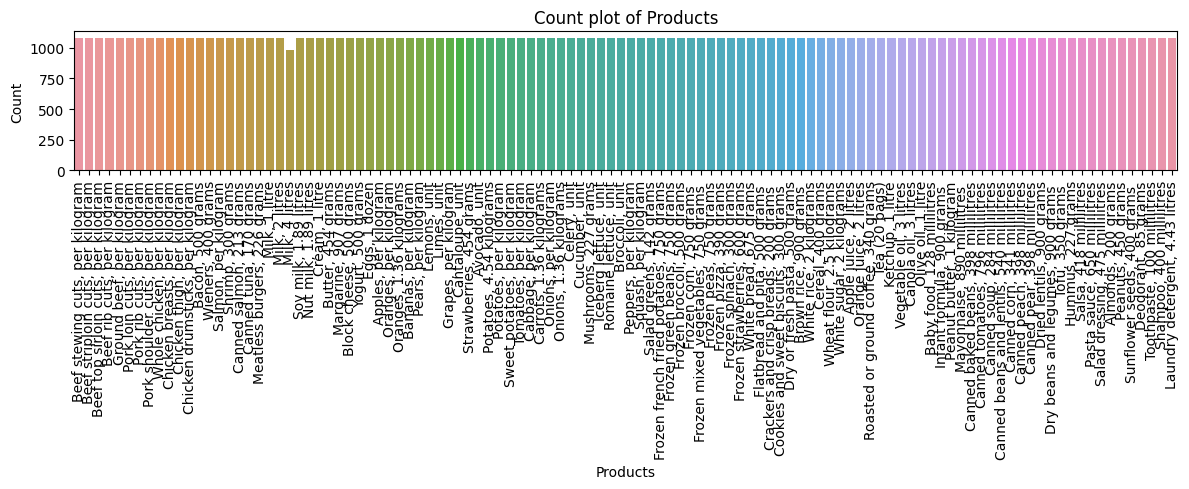

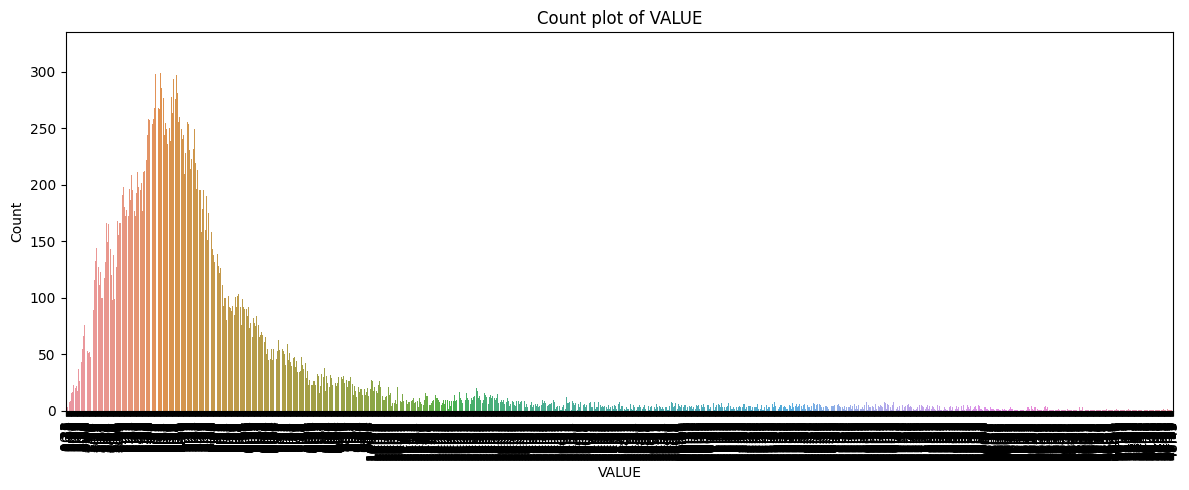

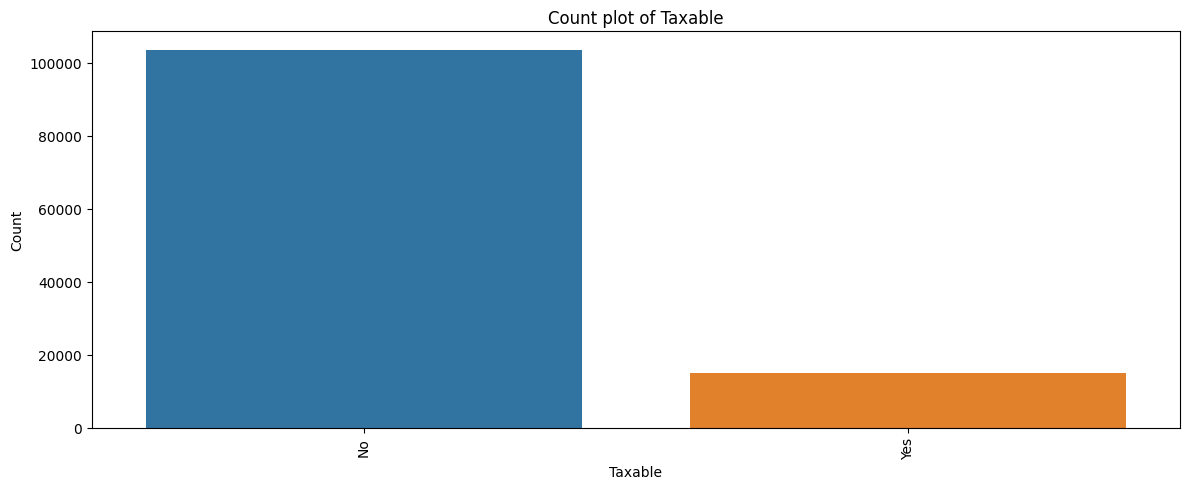

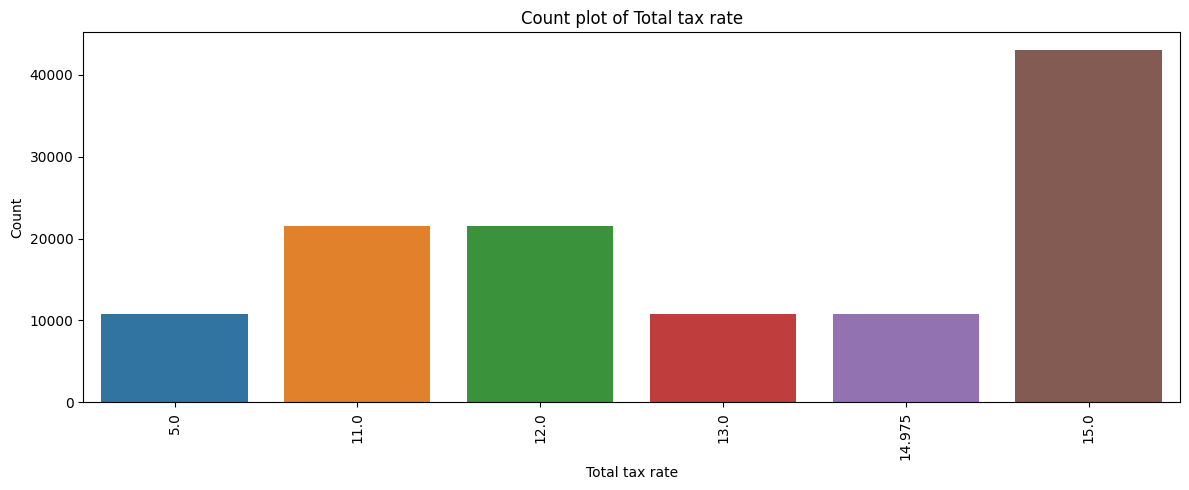

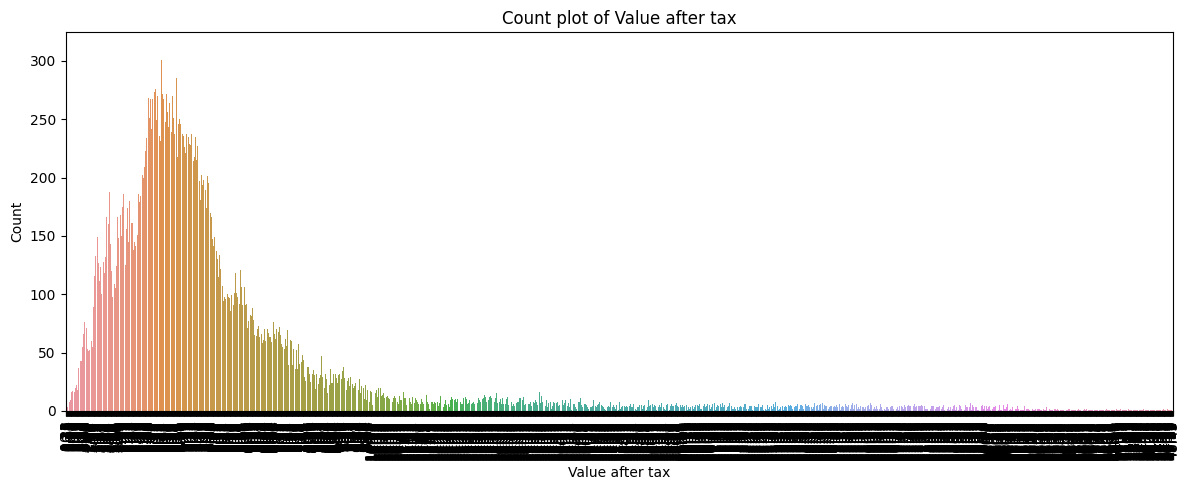

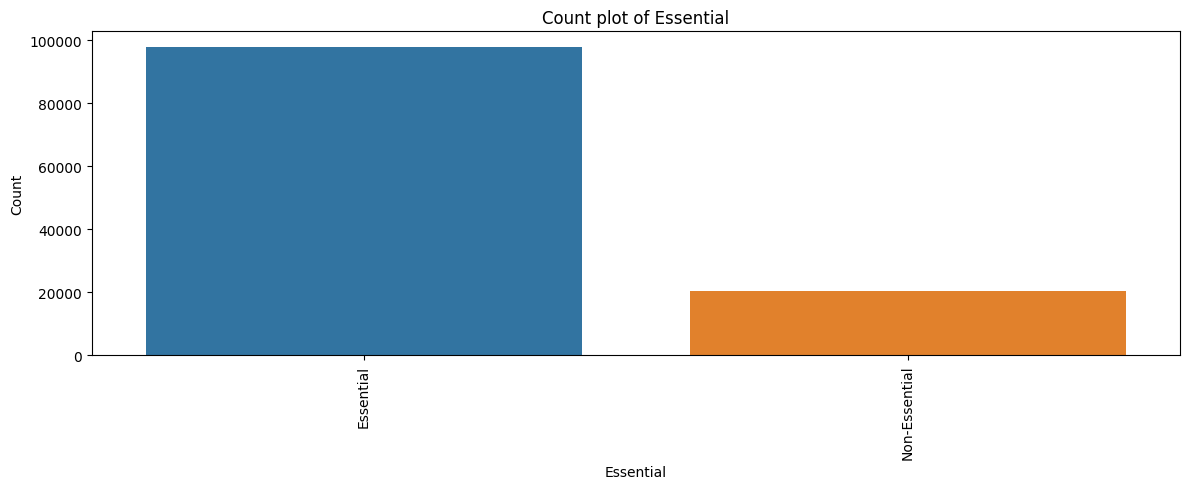

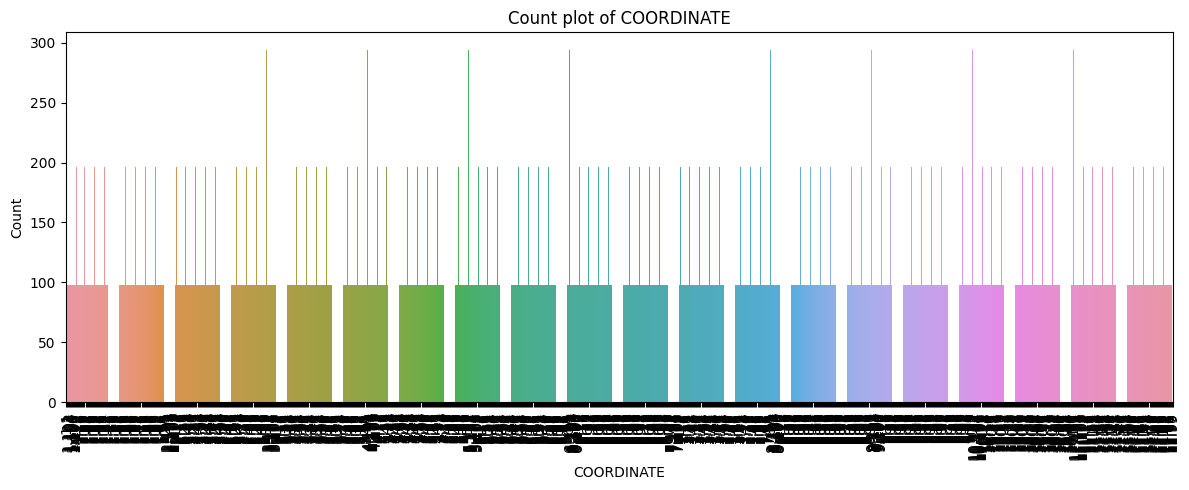

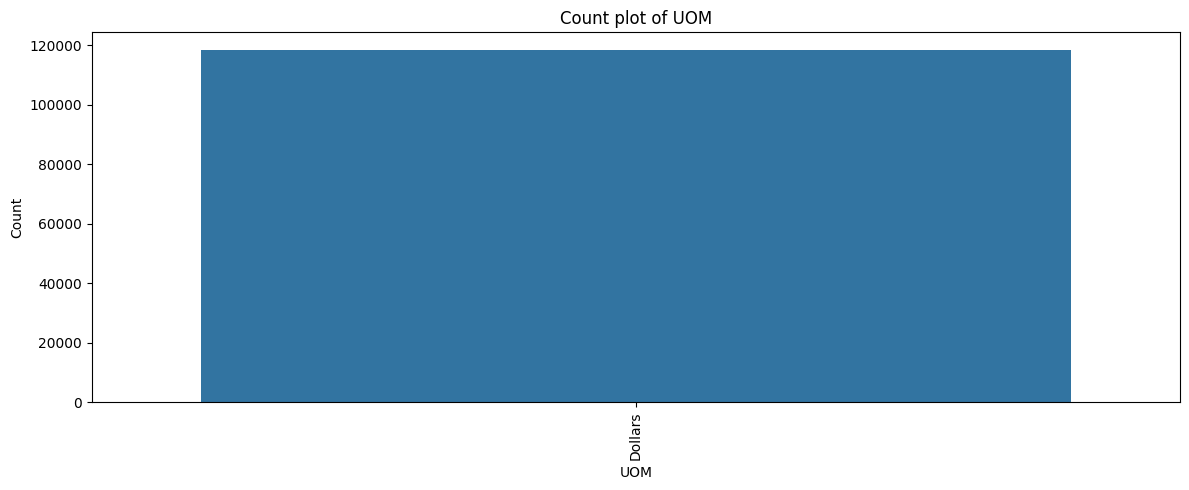

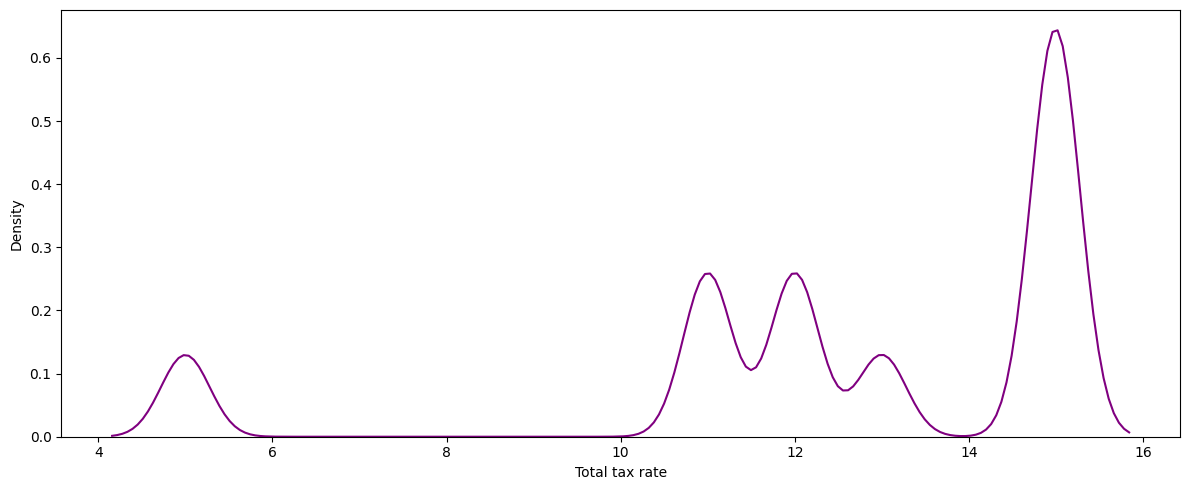

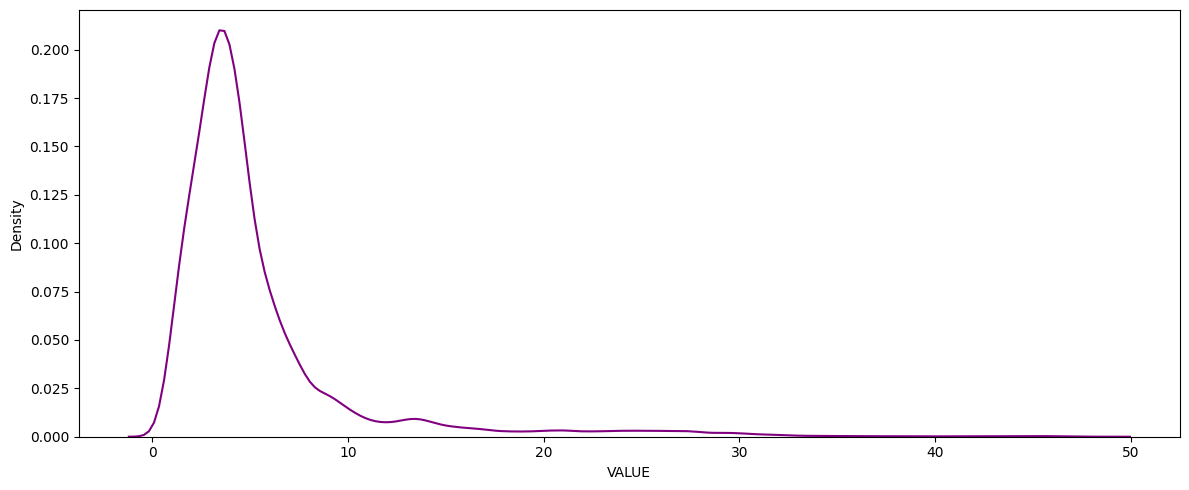

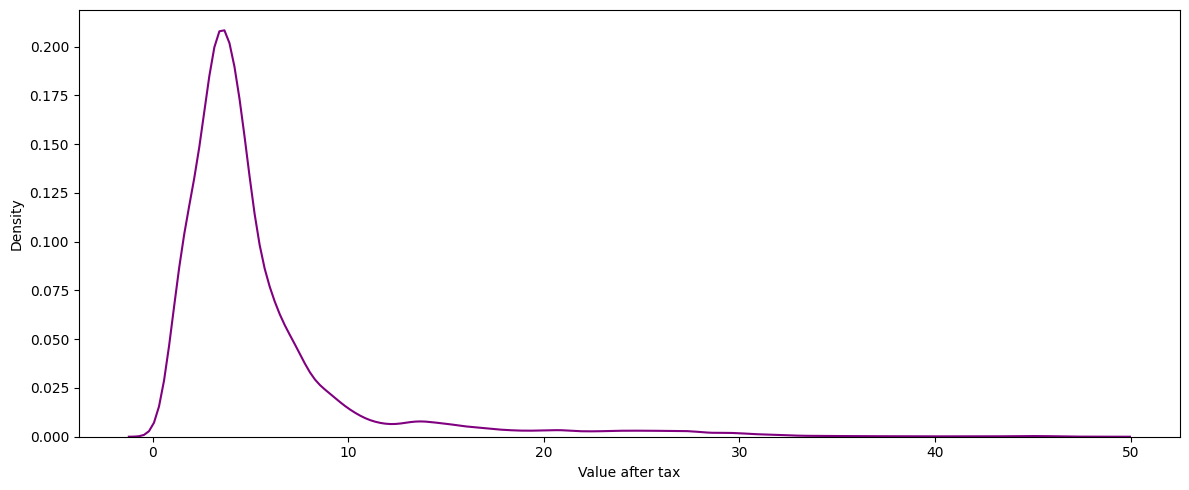

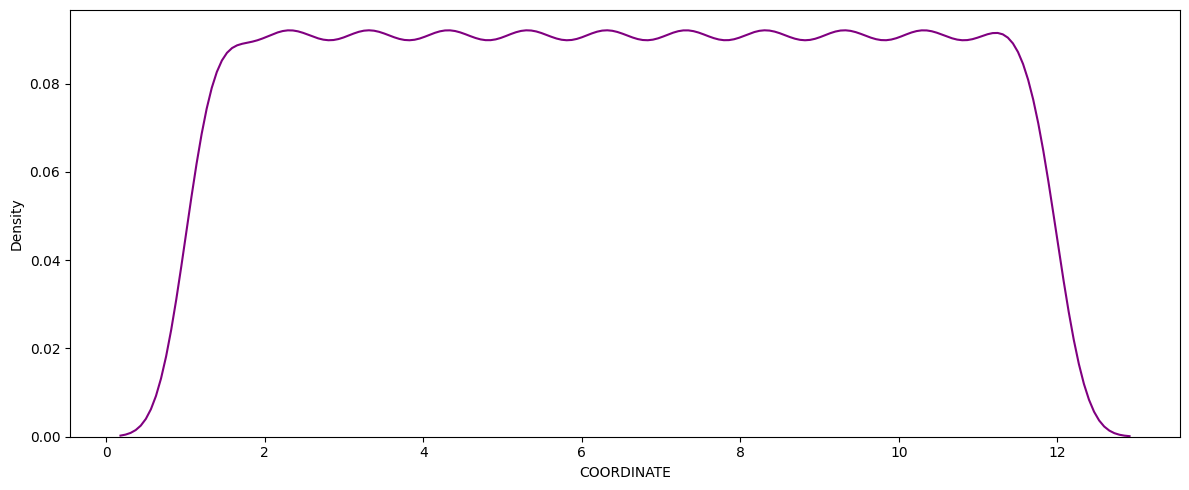

In [10]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(12,5))
        sns.countplot(x=features,data=df)
        plt.title(f'Count plot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()


feat = ['Total tax rate','VALUE','Value after tax','COORDINATE']
for features in feat:
    if features in df.columns:
        plt.figure(figsize=(12,5))
        sns.kdeplot(df[features].dropna(),color='purple')
        plt.tight_layout()
        plt.show()


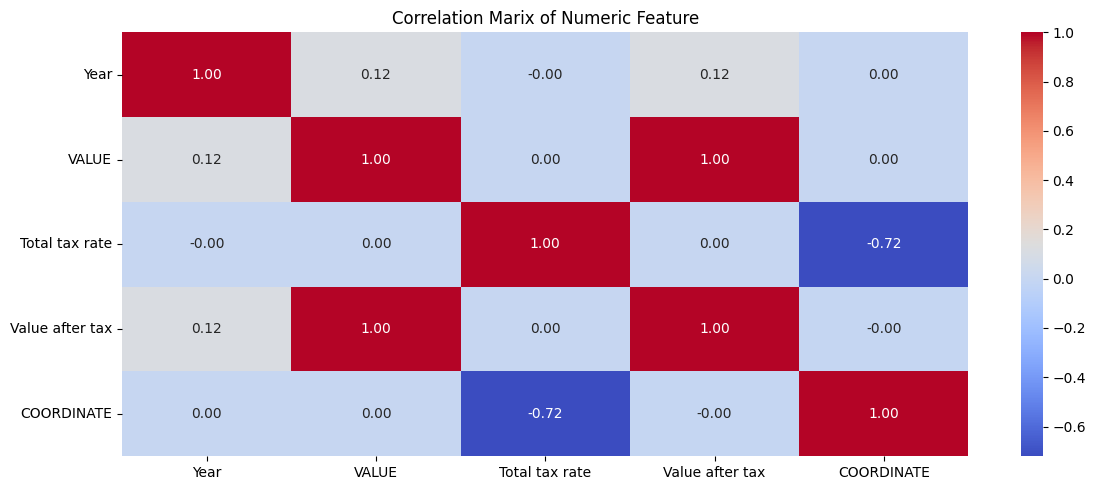

In [11]:
# Heat map
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12,5))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title(f'Correlation Marix of Numeric Feature')
    plt.tight_layout()
    plt.show()

> Interesting Observations:

   * VALUE and Value after tax:

     -  1.00 correlation: They’re nearly identical — maybe one is computed from the other.

     - You might consider dropping one of them (feature redundancy).

   * Total tax rate vs COORDINATE:

       - Correlation is -0.72: Strong inverse relationship.

       - Could be spatial effects in taxation patterns.

   * Most other values near 0:

       - Features like Year and Total tax rate or VALUE don't show meaningful linear correlation.

# Feature Engineering
> Plotting kde-plot after MinMaxScaler

In [12]:
from sklearn.preprocessing import MinMaxScaler

feat = ['Total tax rate','VALUE','Value after tax','COORDINATE']
min_max = MinMaxScaler()
for column in feat:
    df[column] = min_max.fit_transform(df[[column]])




FOR TOTAL TAX RATE :

>  Most values are skewed toward the higher end (near 1) — suggesting many entities in your dataset have a relatively high total tax rate.

>  The tiny peak near 0 means there are a few entities with very low tax rates.

>  Several sharp bumps mean your data might be categorically clumped around certain percentages (e.g., 25%, 40%, etc.).

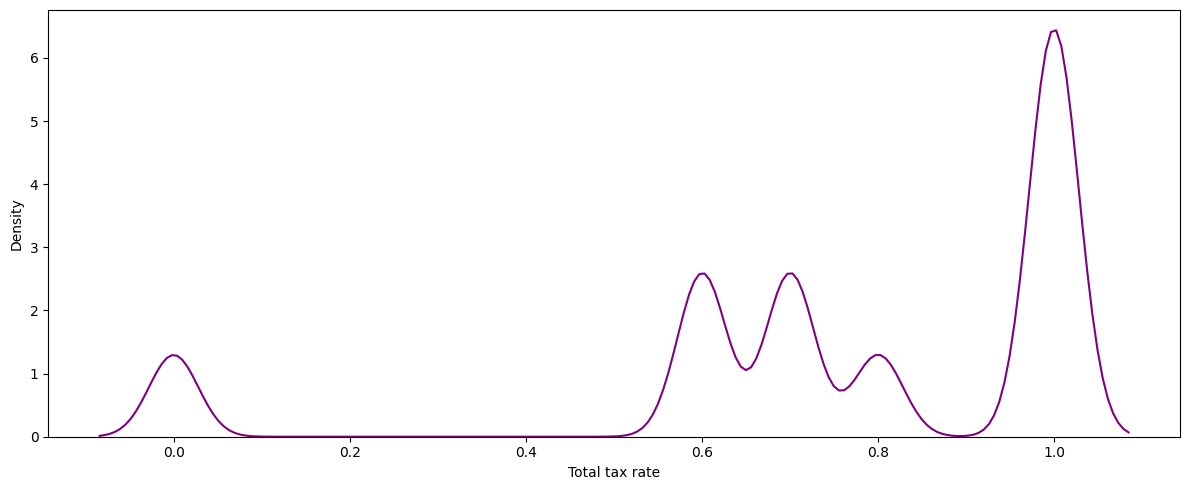

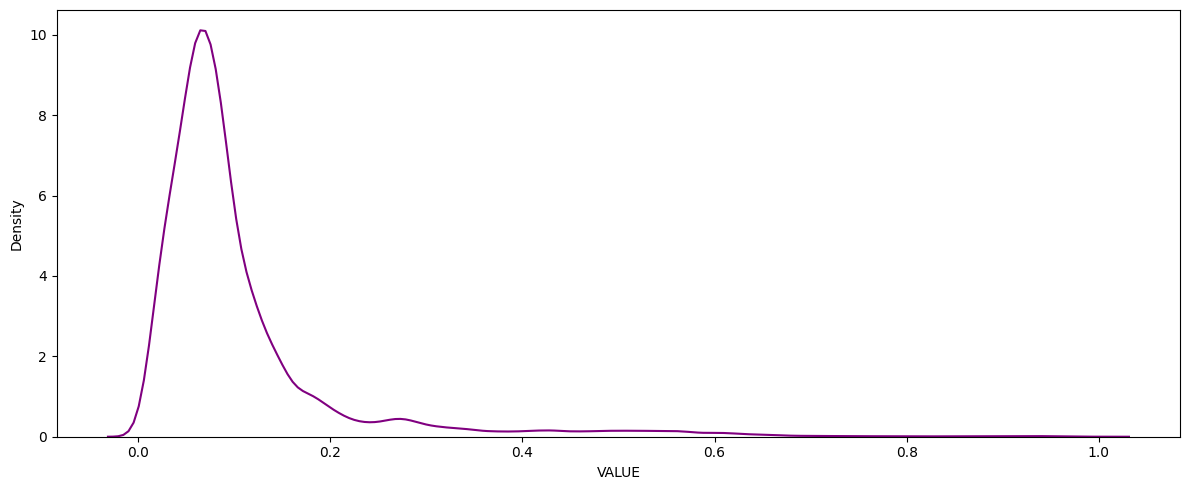

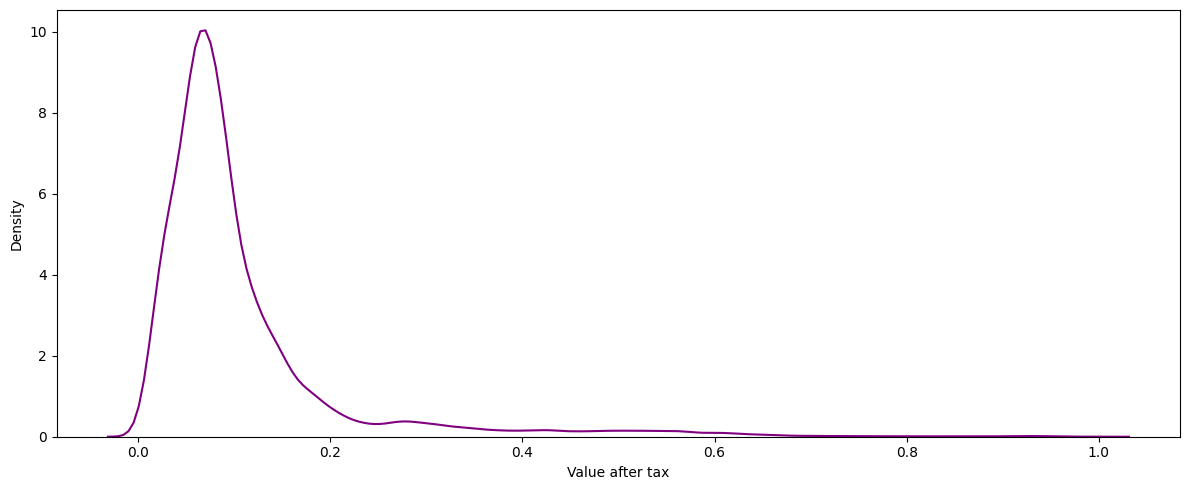

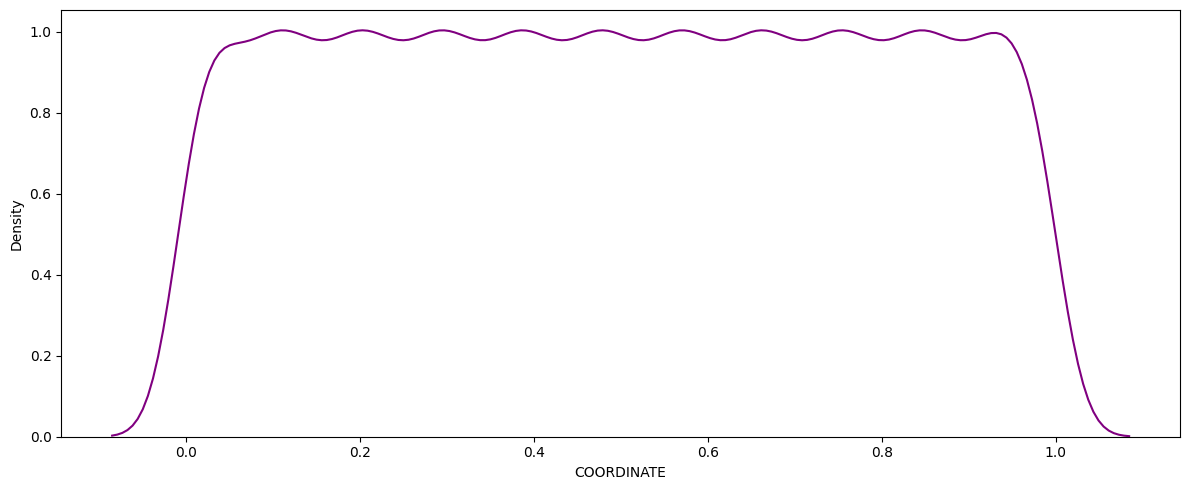

In [13]:
for features in feat:
    if features in df.columns:
        plt.figure(figsize=(12,5))
        sns.kdeplot(df[features].dropna(),color='purple')
        plt.tight_layout()
        plt.xlabel(features)
        plt.show()

In [14]:
df

,Year,Month,GEO,Product Category,Products,VALUE,Taxable,Total tax rate,Value after tax,Essential,COORDINATE,UOM
0,2017,January,Province 1,Meat & Poultry,"Beef stewing cuts, per kilogram",0.256698,No,0.6,0.256698,Essential,0.918274,Dollars
1,2017,January,Province 1,Meat & Poultry,"Beef striploin cuts, per kilogram",0.449429,No,0.6,0.449429,Essential,0.927456,Dollars
2,2017,January,Province 1,Meat & Poultry,"Beef top sirloin cuts, per kilogram",0.272897,No,0.6,0.272897,Essential,0.936639,Dollars
3,2017,January,Province 1,Meat & Poultry,"Beef rib cuts, per kilogram",0.412669,No,0.6,0.412669,Essential,0.946740,Dollars
4,2017,January,Province 1,Meat & Poultry,"Ground beef, per kilogram",0.183178,No,0.6,0.183178,Essential,0.945822,Dollars
...,...,...,...,...,...,...,...,...,...,...,...,...
118477,2025,February,Province 11,Nuts & Snacks,"Sunflower seeds, 400 grams",0.087227,No,0.7,0.087227,Non-Essential,0.827273,Dollars
118478,2025,February,Province 11,Toiletries & Cleaning,"Deodorant, 85 grams",0.161371,Yes,0.7,0.181516,Essential,0.886134,Dollars
118479,2025,February,Province 11,Toiletries & Cleaning,"Toothpaste, 100 millilitres",0.079543,Yes,0.7,0.089927,Essential,0.887052,Dollars
118480,2025,February,Province 11,Toiletries & Cleaning,"Shampoo, 400 millilitres",0.142887,Yes,0.7,0.160748,Essential,0.887971,Dollars


# Data preprocessing

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
lab_col = ['Month', 'GEO', 'Product Category', 'Products','Taxable','Essential','UOM']

In [17]:
le = LabelEncoder()

In [18]:
for column in lab_col:
    df[column] = le.fit_transform(df[column])

In [19]:
df.columns

Index(['Year', 'Month', 'GEO', 'Product Category', 'Products', 'VALUE',
       'Taxable', 'Total tax rate', 'Value after tax', 'Essential',
       'COORDINATE', 'UOM'],
      dtype='object')

In [20]:
df

,Year,Month,GEO,Product Category,Products,VALUE,Taxable,Total tax rate,Value after tax,Essential,COORDINATE,UOM
0,2017,4,0,9,8,0.256698,0,0.6,0.256698,0,0.918274,0
1,2017,4,0,9,9,0.449429,0,0.6,0.449429,0,0.927456,0
2,2017,4,0,9,10,0.272897,0,0.6,0.272897,0,0.936639,0
3,2017,4,0,9,7,0.412669,0,0.6,0.412669,0,0.946740,0
4,2017,4,0,9,53,0.183178,0,0.6,0.183178,0,0.945822,0
...,...,...,...,...,...,...,...,...,...,...,...,...
118477,2025,3,2,10,96,0.087227,0,0.7,0.087227,1,0.827273,0
118478,2025,3,2,12,37,0.161371,1,0.7,0.181516,0,0.886134,0
118479,2025,3,2,12,101,0.079543,1,0.7,0.089927,0,0.887052,0
118480,2025,3,2,12,91,0.142887,1,0.7,0.160748,0,0.887971,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118482 entries, 0 to 118481
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              118482 non-null  int64  
 1   Month             118482 non-null  int64  
 2   GEO               118482 non-null  int64  
 3   Product Category  118482 non-null  int64  
 4   Products          118482 non-null  int64  
 5   VALUE             118482 non-null  float64
 6   Taxable           118482 non-null  int64  
 7   Total tax rate    118482 non-null  float64
 8   Value after tax   118482 non-null  float64
 9   Essential         118482 non-null  int64  
 10  COORDINATE        118482 non-null  float64
 11  UOM               118482 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 10.8 MB


# Model Section

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score

In [23]:
X = df.drop(columns=['Year', 'Month', 'GEO', 'Product Category', 'Products','Taxable', 'Total tax rate', 'Essential','UOM'])
y = df['Total tax rate']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [26]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "KNeighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(verbosity=0)
}

In [27]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        'Model': name,
        'R2 Score': round(r2, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4)
    })

In [28]:
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)

              Model  R2 Score     MSE    RMSE     MAE
4      DecisionTree    1.0000  0.0000  0.0000  0.0000
5      RandomForest    1.0000  0.0000  0.0000  0.0000
6  GradientBoosting    1.0000  0.0000  0.0000  0.0000
7          AdaBoost    1.0000  0.0000  0.0000  0.0000
8        KNeighbors    0.9995  0.0000  0.0068  0.0002
9           XGBoost    0.9982  0.0001  0.0122  0.0006
0  LinearRegression    0.5214  0.0402  0.2006  0.1316
1             Ridge    0.5213  0.0402  0.2006  0.1315
2             Lasso   -0.0000  0.0841  0.2899  0.2215
3        ElasticNet   -0.0000  0.0841  0.2899  0.2215


# CONCLUSION:
> As we clearly see `DecisionTree`,`RandomForest`,`GradientBoosting`,`AdaBoost` Gives the **BEST** results, AS we compare to other models.

> `KNeighbors`,`XGBoost` these also give the Result Around 99%.
>
> **BUT THE ISSUE HERE IS `MSE`,`MAE`,`RMSE` THEY ARE COMMING '0' WHERE THE RESULT IS 100% PROBABLY ITS DUE TO `OVERFIT`, which need to resolve.**
